In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PlayTennis.csv to PlayTennis.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['PlayTennis.csv']))

In [ ]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
X = df.drop(columns=['play'])
y = df['play']

In [ ]:
X.head()

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train, y_test = train_test_split(X,y,test_size= 0.2 , random_state= 4)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df_encoded = pd.get_dummies(X_train, columns=['outlook', 'windy'])

In [ ]:
df_encoded

,temp,humidity,outlook_overcast,outlook_rainy,outlook_sunny,windy_False,windy_True
9,mild,normal,False,True,False,True,False
6,cool,normal,True,False,False,False,True
13,mild,high,False,True,False,False,True
2,hot,high,True,False,False,True,False
0,hot,high,False,False,True,True,False
12,hot,normal,True,False,False,True,False
8,cool,normal,False,False,True,True,False
1,hot,high,False,False,True,False,True
5,cool,normal,False,True,False,False,True
7,mild,high,False,False,True,True,False


In [ ]:
ordinal_encoder = OrdinalEncoder()

In [ ]:
df_encoded[['temp', 'humidity']] = ordinal_encoder.fit_transform(X_train[['temp', 'humidity']])


In [ ]:
df_encoded

,temp,humidity,outlook_overcast,outlook_rainy,outlook_sunny,windy_False,windy_True
9,2.0,1.0,False,True,False,True,False
6,0.0,1.0,True,False,False,False,True
13,2.0,0.0,False,True,False,False,True
2,1.0,0.0,True,False,False,True,False
0,1.0,0.0,False,False,True,True,False
12,1.0,1.0,True,False,False,True,False
8,0.0,1.0,False,False,True,True,False
1,1.0,0.0,False,False,True,False,True
5,0.0,1.0,False,True,False,False,True
7,2.0,0.0,False,False,True,True,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

clm = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(sparse = True ,drop = 'first'), ['outlook','temp','windy']),
        ('ordinal',OrdinalEncoder(categories=[['high','normal']]),['humidity']),
    ], remainder= 'passthrough'
)

In [ ]:
X_train_trf = clm.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_trf

array([[1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1.]])

In [ ]:
X_test_trf = clm.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion= 'entropy')

In [ ]:
clf.fit(X_train_trf,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = clf.predict(X_test_trf)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6666666666666666


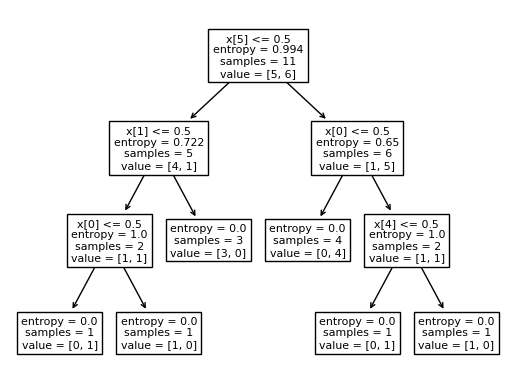

In [ ]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [ ]:
features = ['outlook_overcast','outlook_rainy','temp_cool','temp_mild', 'humidity','windy_False']

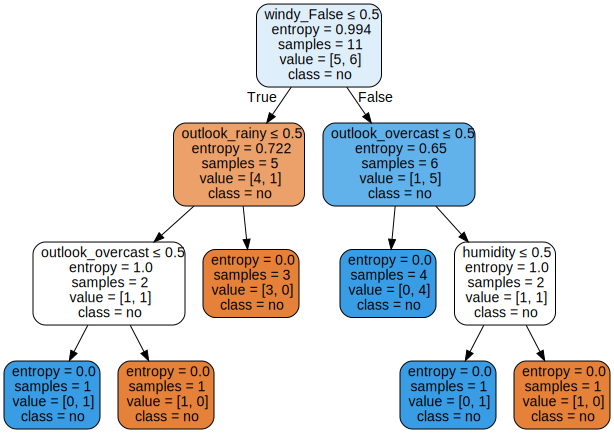

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf,out_file =None ,
                                feature_names = features,
                                class_names = y_train,
                                filled=True , rounded = True , special_characters = True)
graph = graphviz.Source(dot_data)

graph